### Defining Visualisation functions

In [2]:
import matplotlib.pyplot as plt
def lplot(MSE , L2 , LOSS):

    """
    Plots MSE L2error and the loss function.

    Parameters:
    MSE,L2error and LOSS (numpy arrays or lists): The EVALUATION METRICS.

    Returns:
    None
    """
    

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(MSE, label='MSE', linestyle='-', marker='o')
    plt.plot(L2, label='L2', linestyle='-', marker='x')
    plt.plot(LOSS, label='LOSS', linestyle='-', marker='s')

    # Add titles and labels
    plt.title('Values of MSE, L2error, and LOSS')
    plt.xlabel('Index')
    plt.ylabel('Value')

    # Add a legend
    plt.legend()

    # Add a grid for better readability
    plt.grid(True)

    # Show the plot
    plt.show()
def plot_logged_weights(W1, W2, W3):
    """
    Plots the logarithm of the first 400 elements of W1, W2, and W3.

    Parameters:
    W1, W2, W3 (numpy arrays or lists): The weights to be plotted.

    Returns:
    None
    """
    plt.figure(figsize=(12, 8))

    plt.plot(np.log(W1[:400]), label='Log(W1)', linestyle='-', marker='o', markersize=4)
    plt.plot(np.log(W2[:400]), label='Log(W2)', linestyle='-', marker='x', markersize=4)
    plt.plot(np.log(W3[:400]), label='Log(W3)', linestyle='-', marker='s', markersize=4)

    plt.title('Logarithmic Values of Weights W1, W2, W3', fontsize=16)
    plt.xlabel('Index', fontsize=14)
    plt.ylabel('Log(Value)', fontsize=14)
    
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)
    
    plt.show()

   

In [3]:
def plot_sol(model):

    # Defning a set of points (Grid)
    x = torch.linspace(-1, 1, 50).to(device)
    y = torch.linspace(-1, 1, 50).to(device)
    x, y = torch.meshgrid(x, y)

    # Computing the exact dolution and the prediction
    u_ex = u_exact(x, y).cpu().detach().numpy()
    u = u_pred(x.flatten().unsqueeze(1), y.flatten().unsqueeze(1),model).cpu()
    u = u.detach().numpy().reshape(50, 50)

    # Calculate errors
    relative_error = np.linalg.norm((u_ex - u)) / np.linalg.norm(u_ex)
    mse_error = np.mean((u - u_ex)**2)

    print(relative_error)
    print(mse_error)

    # Create the plot
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Plot the exact solution
    contour1 = axs[0].contourf(x.cpu(), y.cpu(), u_ex, levels=100, cmap='jet')
    fig.colorbar(contour1, ax=axs[0], label='u')
    axs[0].set_title('Exact Solution')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')

    # Plot the predicted solution
    contour2 = axs[1].contourf(x.cpu(), y.cpu(), u, levels=100, cmap='jet')
    fig.colorbar(contour2, ax=axs[1], label='u')
    axs[1].set_title('Predicted Solution')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')

    # Show the plot
    plt.show()
def plot_error(model):
    # Defning a set of points (Grid)
    x = torch.linspace(-1, 1, 50).to(device)
    y = torch.linspace(-1, 1, 50).to(device)
    x, y = torch.meshgrid(x, y)

    # Computing the exact dolution and the prediction
    u_ex = u_exact(x, y).cpu().detach().numpy()
    u = u_pred(x.flatten().unsqueeze(1), y.flatten().unsqueeze(1),model).cpu()
    u = u.detach().numpy().reshape(50, 50)

    # Calculate errors
    error = np.abs(u_ex - u)
    residual = u_ex - u

    # Create the plot
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Plot the exact solution
    contour1 = axs[0].contourf(x.cpu(), y.cpu(), error, levels=100, cmap='jet')
    fig.colorbar(contour1, ax=axs[0], label='u')
    axs[0].set_title('error')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')

    # Plot the predicted solution
    contour2 = axs[1].contourf(x.cpu(), y.cpu(), residual, levels=100, cmap='jet')
    fig.colorbar(contour2, ax=axs[1], label='u')
    axs[1].set_title('residual')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')

    # Show the plot
    plt.show()
    


### Trainig the PINN's

In [2]:
from Solving_Poisson import *
from Architectures import *
import psutil
import os
import sys

def get_memory_usage():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss / (1024 ** 2) 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_1 = Net(2,1,50,4)#.to(device)

x = torch.linspace(-3, 3, 100)#.to(device)
y = torch.linspace(-3, 3, 100)#.to(device)
x, y = torch.meshgrid(x, y)

x_flat = x.flatten().unsqueeze(1)
y_flat = y.flatten().unsqueeze(1)

weight_bc = torch.tensor(1.0, requires_grad=True)
weight_i = torch.tensor(1.0, requires_grad=True)
weight_f = torch.tensor(1.0, requires_grad=True)

optimizer = torch.optim.Adam(model_1.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=500, gamma=0.1)

model_1,LOSS_1 , MSE_1 , L2_error_1 ,_,_,_  = train_pinn(x_flat, y_flat , model_1 , optimizer,scheduler ,4000,loss_function)


Epoch 0, Loss 3.4268007278442383, mse : 0.14703485369682312,l2_error: 5.8636250495910645
Epoch 100, Loss 0.057648781687021255, mse : 0.0011812344891950488,l2_error: 0.525562047958374
Epoch 200, Loss 0.0010149460285902023, mse : 6.796038360334933e-05,l2_error: 0.12606188654899597
Epoch 300, Loss 0.0006598181207664311, mse : 2.279745058331173e-05,l2_error: 0.07301277667284012
Epoch 400, Loss 0.0010364948539063334, mse : 5.7162196753779426e-05,l2_error: 0.11561398208141327
Epoch 500, Loss 0.0001697206316748634, mse : 3.699623903230531e-06,l2_error: 0.029412727802991867
Epoch 600, Loss 0.0001556286442792043, mse : 3.2887205634324346e-06,l2_error: 0.0277312770485878
Epoch 700, Loss 0.00014235360140446573, mse : 2.891677695515682e-06,l2_error: 0.026003433391451836
Epoch 800, Loss 0.0001300372532568872, mse : 2.551044644860667e-06,l2_error: 0.024423910304903984
Epoch 900, Loss 0.00011882685794262215, mse : 2.2699568944517523e-06,l2_error: 0.0230390727519989
Epoch 1000, Loss 0.0001087755154003

0.010236066
3.951647e-06 2128.44140625


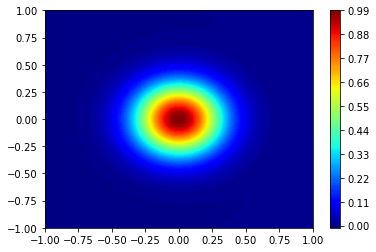

In [13]:
import torch


x = torch.linspace(-1, 1, 50)#.to(device)
y = torch.linspace(-1, 1, 50)#.to(device)
x, y = torch.meshgrid(x, y)

u_ex = u_exact(x,y).cpu().detach().numpy()

u = u_pred(x.flatten().unsqueeze(1), y.flatten().unsqueeze(1),model_1)
u = u.cpu().detach().numpy().reshape(50,50)

print(np.linalg.norm((u_ex - u)) / np.linalg.norm(u_ex))
print(np.mean((u - u_ex)**2) , get_memory_usage())
plt.contourf(x.cpu(), y.cpu(), u,levels=100, cmap='jet')
plt.colorbar()

### Visualisation of Results

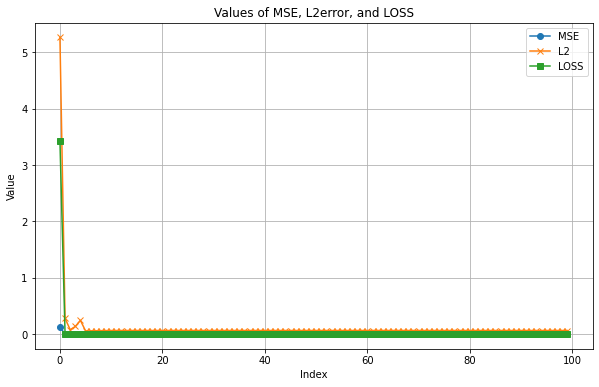

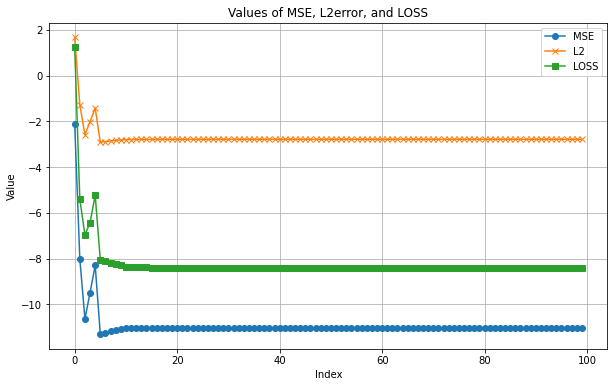

0.03579673
4.8328002e-05


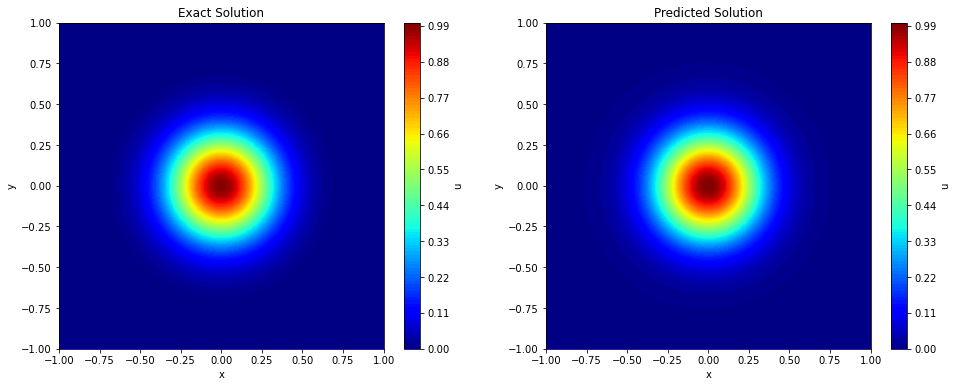

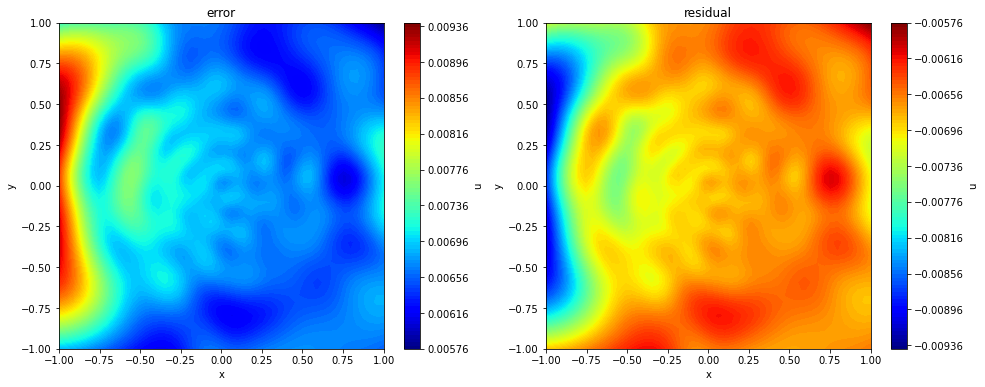

In [89]:
log_MSE_1 = np.log(MSE_1[:250])
log_L2 = np.log(L2[:250])
log_LOSS_1 = np.log(LOSS_1[:250])
lplot(MSE_1 , L2 , LOSS_1)
lplot(log_MSE_1 , log_L2 , log_LOSS_1) 
plot_sol(model_1)
plot_error(model_1)

### Training the adaptive weights model

In [21]:
from Solving_Poisson import *
from Architectures import *
import time
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_2 = Net(2,1,50,4).to(device)

x = torch.linspace(-3, 3, 125).to(device)
y = torch.linspace(-3, 3, 125).to(device)
x, y = torch.meshgrid(x, y)

x_flat = x.flatten().unsqueeze(1)
y_flat = y.flatten().unsqueeze(1)

weight_bc = torch.tensor(1.0, requires_grad=True)
weight_i = torch.tensor(1.0, requires_grad=True)
weight_f = torch.tensor(1.0, requires_grad=True)

optimizer = torch.optim.Adam([{'params':model_2.parameters()} ,{'params':[weight_bc, weight_i, weight_f]} ], lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.9)
start = time.time()
model_2,LOSS_2 , MSE_2 , L2_error_2 , W1,W2,W3 = train_pinn(x_flat, y_flat , model_2 , optimizer,scheduler ,5000,loss_function_with_weights,weight_bc, weight_i, weight_f)
end = time.time()

print(end-start)

Epoch 0, Loss 2.13373064994812, mse : 0.12098773568868637,l2_error: 5.308239459991455
Epoch 100, Loss 0.06019636243581772, mse : 0.0005934899090789258,l2_error: 0.3717803955078125
Epoch 200, Loss 0.0012126112123951316, mse : 6.270575249800459e-05,l2_error: 0.12084633857011795
Epoch 300, Loss 0.000912495597731322, mse : 0.00011361738870618865,l2_error: 0.16266801953315735
Epoch 400, Loss 0.0001669905032031238, mse : 3.2503294278285466e-06,l2_error: 0.027513353154063225
Epoch 500, Loss 0.010299061425030231, mse : 5.465838694362901e-05,l2_error: 0.11282574385404587
Epoch 600, Loss 8.034803613554686e-05, mse : 7.058930350467563e-06,l2_error: 0.04054611921310425
Epoch 700, Loss 5.511976996785961e-05, mse : 8.355159479833674e-06,l2_error: 0.04411204531788826
Epoch 800, Loss 4.2669762478908524e-05, mse : 8.367693226318806e-06,l2_error: 0.044145114719867706
Epoch 900, Loss 3.518565063131973e-05, mse : 7.748280950181652e-06,l2_error: 0.042479801923036575
Epoch 1000, Loss 3.0155613785609603e-05,

### Visualisation of results

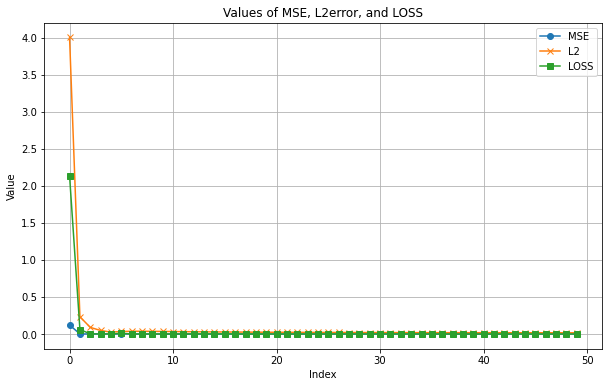

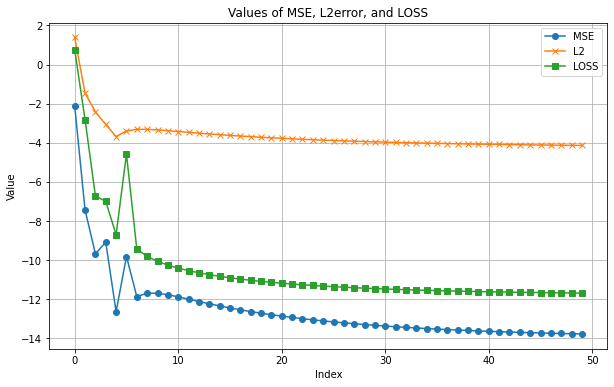

0.010890492
4.4730837e-06


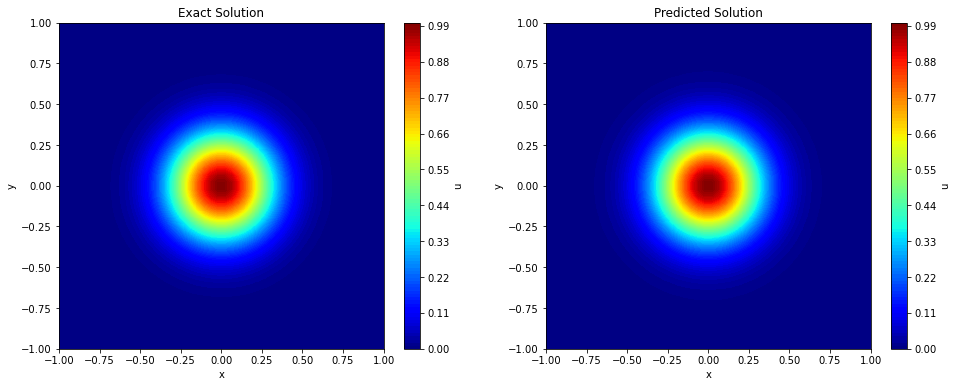

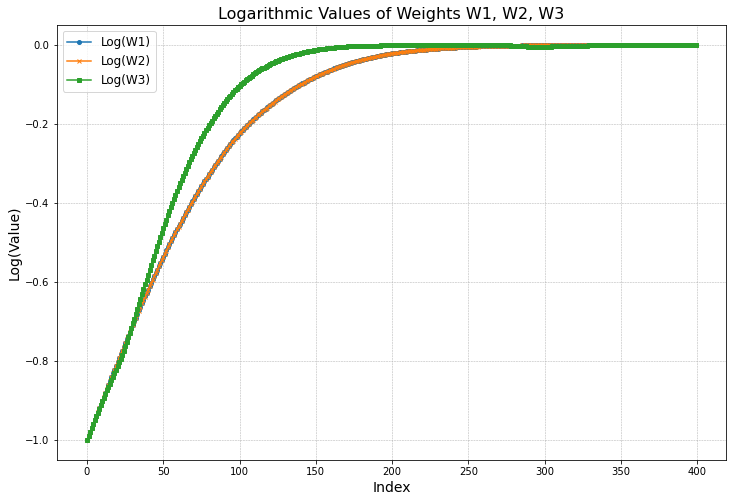

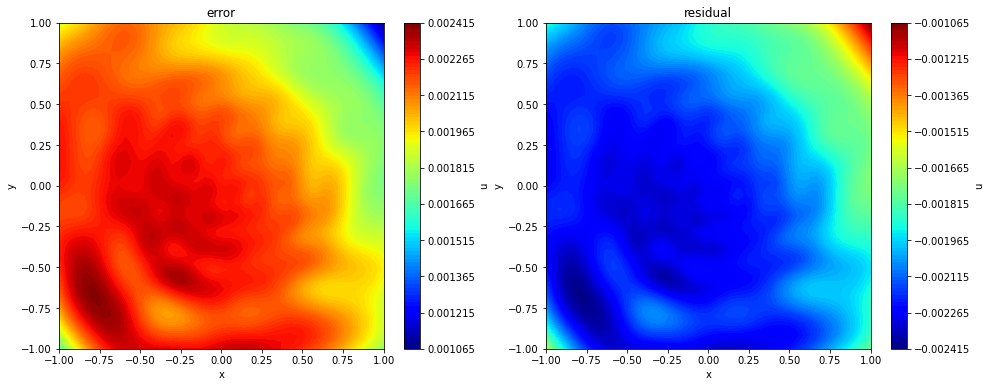

In [22]:

lplot(MSE_2 , L2_2 , LOSS_2) 
log_MSE_2 = np.log(MSE_2[:250])
log_L2_2 = np.log(L2_2[:250])
log_LOSS_2 = np.log(LOSS_2[:250])
lplot(log_MSE_2 , log_L2_2 , log_LOSS_2) 
plot_sol(model_2)
plot_logged_weights(W1, W2, W3)
plot_error(model_2)


### Training the adaptive collocation points model

In [16]:
from Solving_Poisson import *
from Architectures import *
import time
x_adaptive, y_adaptive = create_grid(10000)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(2,1,50,4).to(device)

x = torch.linspace(-3, 3, 100)
y = torch.linspace(-3, 3, 100)
x, y = torch.meshgrid(x, y)

x_flat = x.flatten().unsqueeze(1)
y_flat = y.flatten().unsqueeze(1)

x_flat = x_flat.to(device)
y_flat = y_flat.to(device)

x2 ,y2 = select_random_points(x_adaptive, y_adaptive, 10000)
x2, y2 = torch.tensor(x2).unsqueeze(1).float(),torch.tensor(y2).unsqueeze(1).float()

x2 = x2.to(device)
y2 = y2.to(device)

x2.requires_grad = True
y2.requires_grad = True

weight_bc = torch.tensor(1.0, requires_grad=True)
weight_i = torch.tensor(1.0, requires_grad=True)
weight_f = torch.tensor(1.0, requires_grad=True)

optimizer = torch.optim.Adam([{'params':model.parameters()} ,{'params':[weight_bc, weight_i, weight_f]} ], lr=0.01)
schedular = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.9)

start = time.time()
model , loss , mse ,l2 ,W1 ,W2 ,W3 = train_pinn_with_adaptive_collocation_points(x_flat, y_flat,x2 , y2, model , optimizer,schedular ,5001,loss_function_with_adaptive_collocation_points,5001,weight_bc, weight_i, weight_f)
end = time.time()
print(end-start)

Epoch 0, Loss 7.3597798347473145, mse : 0.08606580644845963,l2_error: 4.4861273765563965


/home/mohammed.khlifi/Project/Solving_Poisson.py:223: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_adaptive, y_adaptive = torch.tensor(x_adaptive).float(),torch.tensor(y_adaptive).float()


Epoch 100, Loss 0.3240702748298645, mse : 0.0020966902375221252,l2_error: 0.7002020478248596
Epoch 200, Loss 0.077549509704113, mse : 0.0025094172451645136,l2_error: 0.7660233378410339
Epoch 300, Loss 0.044021524488925934, mse : 0.0012586290249601007,l2_error: 0.5425065159797668
Epoch 400, Loss 0.029072312638163567, mse : 0.0007696849061176181,l2_error: 0.42424094676971436
Epoch 500, Loss 0.02057850919663906, mse : 0.0005147166666574776,l2_error: 0.3469281792640686
Epoch 600, Loss 0.24210283160209656, mse : 0.0003279311640653759,l2_error: 0.27691546082496643
Epoch 700, Loss 0.012979705817997456, mse : 0.0002786221739370376,l2_error: 0.25524890422821045
Epoch 800, Loss 0.010047719813883305, mse : 0.00018397877283859998,l2_error: 0.2074151188135147
Epoch 900, Loss 0.008202090859413147, mse : 0.00013118960487190634,l2_error: 0.1751483678817749
Epoch 1000, Loss 0.006903179921209812, mse : 9.677863999968395e-05,l2_error: 0.1504339575767517
Epoch 1100, Loss 0.005950241349637508, mse : 7.3190

### Visualisation of Results

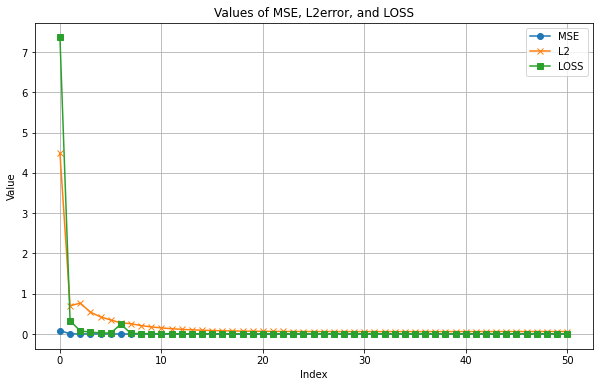

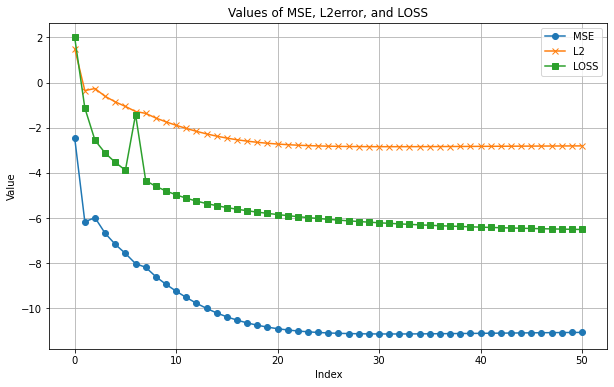

0.01815504
1.2431012e-05


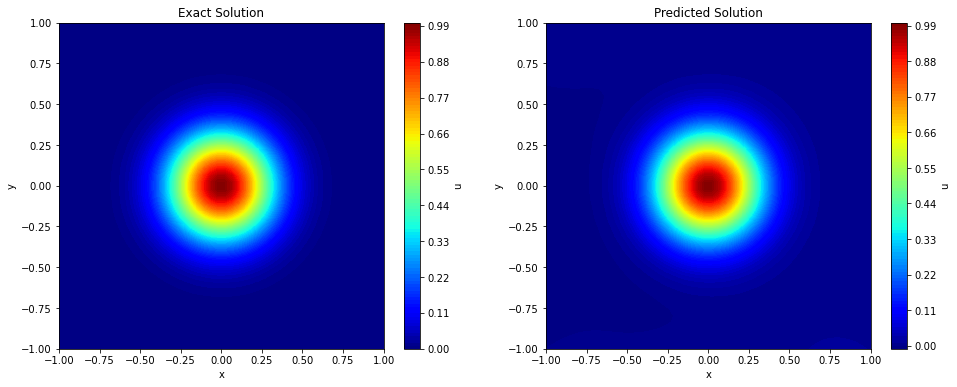

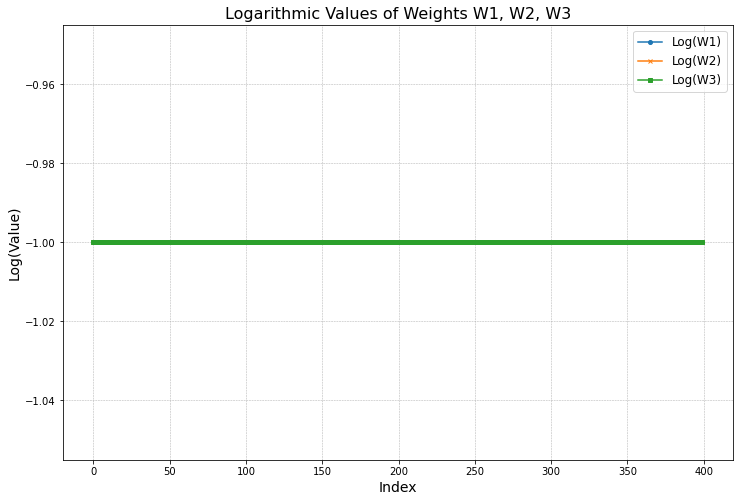

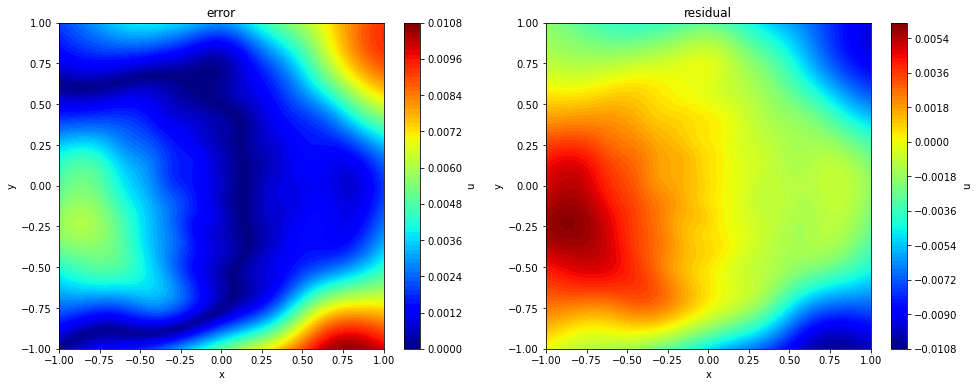

In [18]:
lplot(mse , l2 , loss) 
log_MSE = np.log(mse[:250])
log_L2_2 = np.log(l2[:250])
log_LOSS = np.log(loss[:250])
lplot(log_MSE , log_L2_2 , log_LOSS) 
plot_sol(model)
plot_logged_weights(W1, W2, W3)
plot_error(model)

### Training the adaptive weights and adaptive collocation points model

In [7]:
from Solving_Poisson import *
from Architectures import *
import time
x_adaptive, y_adaptive = create_grid(3000)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(2,1,50,4).to(device)

x = torch.linspace(-3, 3, 50)
y = torch.linspace(-3, 3, 50)
x, y = torch.meshgrid(x, y)

x_flat = x.flatten().unsqueeze(1)
y_flat = y.flatten().unsqueeze(1)

x_flat = x_flat.to(device)
y_flat = y_flat.to(device)

x2 ,y2 = select_random_points(x_adaptive, y_adaptive, 1000)
x2, y2 = torch.tensor(x2).unsqueeze(1).float(),torch.tensor(y2).unsqueeze(1).float()

x2 = x2.to(device)
y2 = y2.to(device)

x2.requires_grad = True
y2.requires_grad = True

weight_bc = torch.tensor(1.0, requires_grad=True)
weight_i = torch.tensor(1.0, requires_grad=True)
weight_f = torch.tensor(1.0, requires_grad=True)

optimizer = torch.optim.Adam([{'params':model.parameters()} ,{'params':[weight_bc, weight_i, weight_f]} ], lr=0.01)
schedular = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.9)

start = time.time()
model , loss , mse ,l2 ,W1 ,W2 ,W3 = train_pinn_with_adaptive_collocation_points(x_flat, y_flat,x2 , y2, model , optimizer,schedular ,10001,loss_function_with_weights_and_adaptive_collocation_points,200,weight_bc, weight_i, weight_f)
end = time.time()
print(end-start)

Epoch 0, Loss 8.316920280456543, mse : 0.03390881419181824,l2_error: 2.8446028232574463


/home/mohammed.khlifi/Project/Solving_Poisson.py:227: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_adaptive, y_adaptive = torch.tensor(x_adaptive).float(),torch.tensor(y_adaptive).float()


Epoch 100, Loss 0.5687777996063232, mse : 0.0025498399045318365,l2_error: 0.7800487875938416
Epoch 200, Loss 0.2950420379638672, mse : 0.0013973081950098276,l2_error: 0.5774461030960083
Epoch 300, Loss 0.2691318988800049, mse : 0.0009089869563467801,l2_error: 0.4657402038574219
Epoch 400, Loss 0.2341417372226715, mse : 0.0005541479913517833,l2_error: 0.36364543437957764
Epoch 500, Loss 0.20938999950885773, mse : 0.0002810718142427504,l2_error: 0.25898441672325134
Epoch 600, Loss 0.18532735109329224, mse : 0.00014356797328218818,l2_error: 0.18509462475776672
Epoch 700, Loss 0.16809329390525818, mse : 0.00011162240843987092,l2_error: 0.16320772469043732
Epoch 800, Loss 0.15242551267147064, mse : 9.348681487608701e-05,l2_error: 0.14936216175556183
Epoch 900, Loss 0.1402924358844757, mse : 0.00010197779192822054,l2_error: 0.15599773824214935
Epoch 1000, Loss 0.12891940772533417, mse : 8.567154145566747e-05,l2_error: 0.14298273622989655
Epoch 1100, Loss 0.11943213641643524, mse : 8.54206373

### Visualisation of Results

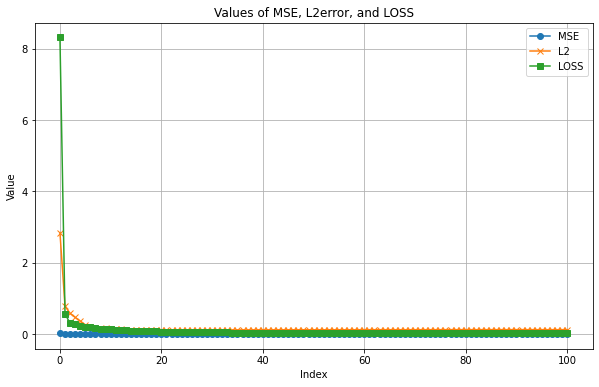

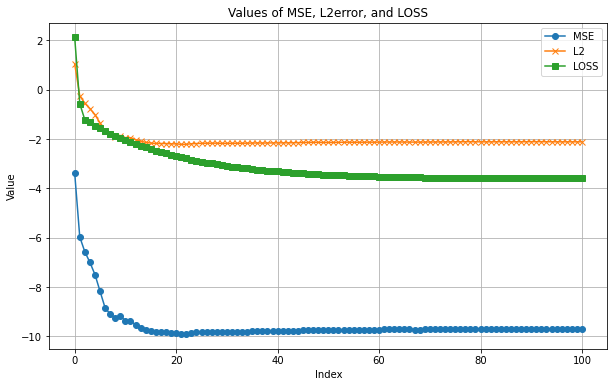

0.07061533
0.00018806588


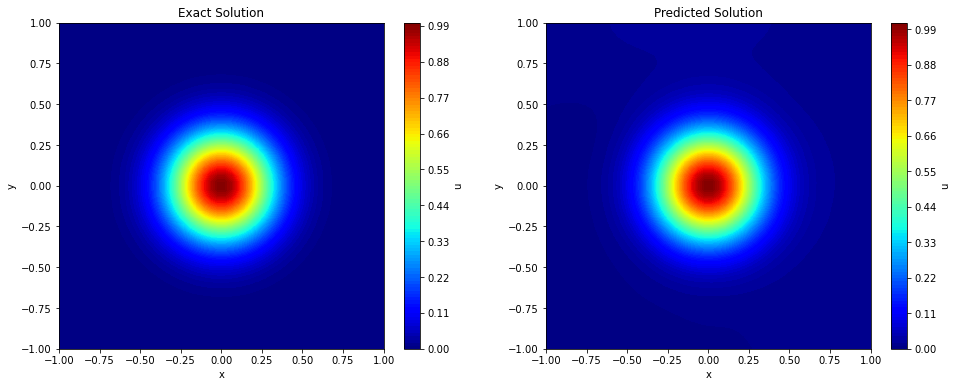

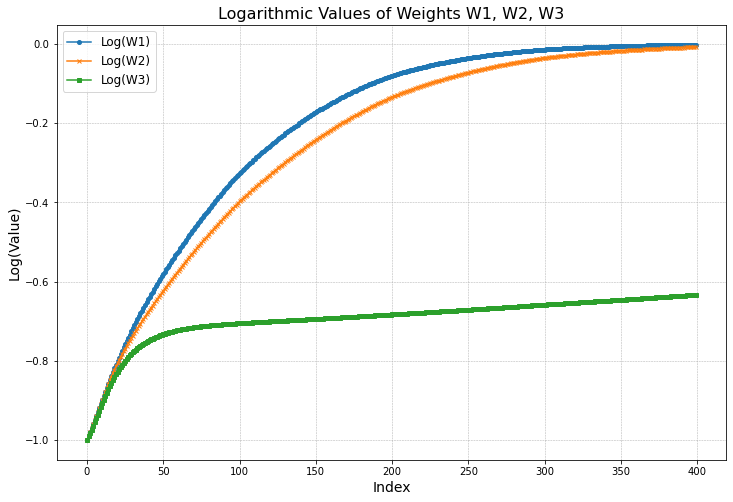

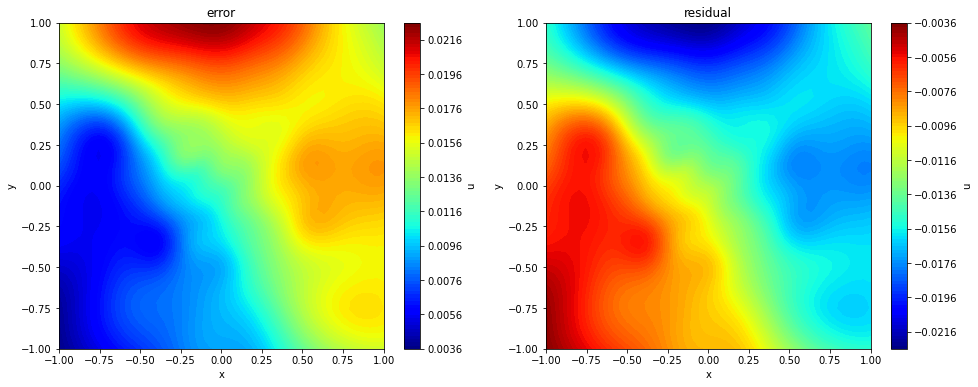

In [8]:
device = torch.device('cpu')
lplot(mse , l2 , loss) 
log_MSE = np.log(mse[:250])
log_L2_2 = np.log(l2[:250])
log_LOSS = np.log(loss[:250])
lplot(log_MSE , log_L2_2 , log_LOSS) 
plot_sol(model)
plot_logged_weights(W1, W2, W3)
plot_error(model)

tensor(9.2143e-06, device='cuda:0', grad_fn=<MeanBackward0>)
0.015630573


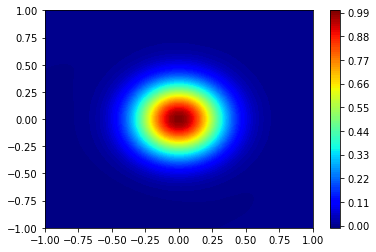

In [22]:
#adaptive_model = joblib.load('AWP_model.pkl')

x = torch.linspace(-1, 1, 50)
y = torch.linspace(-1, 1, 50)
x, y = torch.meshgrid(x, y)
u_ex = u_exact(x,y).detach().numpy()
x = x.flatten().unsqueeze(1)
y = y.flatten().unsqueeze(1)
x = x.to(device)
y = y.to(device)
u = u_pred(x, y,model)
u_ex = torch.exp(-10 * (x**2 + y**2))
mse = torch.mean((u- torch.exp(-10 * (x**2 + y**2)))**2 )

print(mse)
#u = u.detach().numpy().reshape(50,50)

#Risid = risidual(x,y,model_weight)


print(np.linalg.norm((u_ex.cpu().detach().numpy() - u.cpu().detach().numpy())) / np.linalg.norm(u_ex.cpu().detach().numpy()))
#print(np.mean((u - u_ex)**2))
plt.contourf(x.cpu().numpy().reshape(50,50), y.cpu().numpy().reshape(50,50), u.cpu().detach().numpy().reshape(50,50),levels = 100 , cmap = 'jet')
plt.colorbar()
plt.show()


In [1]:
from Architectures import *
PINN_CNN(2,1 ,3)

PINN_CNN(
  (fc0): Linear(in_features=2, out_features=3, bias=True)
  (fc01): Linear(in_features=3, out_features=3, bias=True)
  (w0): Conv2d(3, 3, kernel_size=(1, 1), stride=(1, 1))
  (w1): Conv2d(3, 3, kernel_size=(1, 1), stride=(1, 1))
  (w2): Conv2d(3, 3, kernel_size=(1, 1), stride=(1, 1))
  (w3): Conv2d(3, 3, kernel_size=(1, 1), stride=(1, 1))
  (fc1): Linear(in_features=3, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)

### Comparing all models

In [20]:
from Solving_Poisson import *
from Architectures import *
import time
def Tab_survey(function = 0, boundary_top = 0, boundary_bottom = 0, boundary_left = 0, boundary_right = 0):
    x_adaptive, y_adaptive = create_grid(10000)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model_1 = Net(2,1,50,4).to(device)
    model_2 = Net(2,1,50,4).to(device)
    model_3 = Net(2,1,50,4).to(device)
    model_4 = Net(2,1,50,4).to(device)

    x = torch.linspace(-3, 3, 100)
    y = torch.linspace(-3, 3, 100)
    x, y = torch.meshgrid(x, y)

    x_flat = x.flatten().unsqueeze(1)
    y_flat = y.flatten().unsqueeze(1)

    x_flat = x_flat.to(device)
    y_flat = y_flat.to(device)

    x2 ,y2 = select_random_points(x_adaptive, y_adaptive, 10000)
    x2, y2 = torch.tensor(x2).unsqueeze(1).float(),torch.tensor(y2).unsqueeze(1).float()

    x2 = x2.to(device)
    y2 = y2.to(device)

    x2.requires_grad = True
    y2.requires_grad = True

    weight_bc = torch.tensor(1.0, requires_grad=True)
    weight_i = torch.tensor(1.0, requires_grad=True)
    weight_f = torch.tensor(1.0, requires_grad=True)

    optimizer_1 = torch.optim.Adam([{'params':model_1.parameters()} ,{'params':[weight_bc, weight_i, weight_f]} ], lr=0.01)
    schedular_1 = torch.optim.lr_scheduler.StepLR(optimizer_1, step_size=100, gamma=0.9)
    
    optimizer_2 = torch.optim.Adam([{'params':model_2.parameters()} ,{'params':[weight_bc, weight_i, weight_f]} ], lr=0.01)
    schedular_2 = torch.optim.lr_scheduler.StepLR(optimizer_2, step_size=100, gamma=0.9)
    
    optimizer_3 = torch.optim.Adam([{'params':model_3.parameters()} ,{'params':[weight_bc, weight_i, weight_f]} ], lr=0.01)
    schedular_3 = torch.optim.lr_scheduler.StepLR(optimizer_3, step_size=100, gamma=0.9)
    
    optimizer_4 = torch.optim.Adam([{'params':model_4.parameters()} ,{'params':[weight_bc, weight_i, weight_f]} ], lr=0.01)
    schedular_4 = torch.optim.lr_scheduler.StepLR(optimizer_4, step_size=100, gamma=0.9)
    
    model_1, LOSS_1, MSE_1, L2_error_1, _, _, _ = train_pinn(x_flat, y_flat, model_1, optimizer_1, schedular_1, 1000, loss_function)
    model_2, LOSS_2, MSE_2, L2_error_2, W1, W2, W3 = train_pinn(x_flat, y_flat, model_2, optimizer_2, schedular_2, 1000, loss_function_with_weights, weight_bc, weight_i, weight_f)
    model_3, loss_3, mse_3, L2_error_3, _, _, _ = train_pinn_with_adaptive_collocation_points(x_flat, y_flat, x2, y2, model_3, optimizer_3, schedular_3, 1000, loss_function_with_adaptive_collocation_points, 101)
    model_4, loss_4, mse_4, L2_error_4, W1, W2, W3 = train_pinn_with_adaptive_collocation_points(x_flat, y_flat, x2, y2, model_4, optimizer_4, schedular_4, 1000, loss_function_with_adaptive_collocation_points, 101, weight_bc, weight_i, weight_f)
    
    LOSS_1 = LOSS_1[-1]
    MSE_1 = MSE_1[-1]
    L2_error_1 = L2_error_1[-1]

    LOSS_2 = LOSS_2[-1]
    MSE_2 = MSE_2[-1]
    L2_error_2 = L2_error_2[-1]

    loss_3 = loss_3[-1]
    mse_3 = mse_3[-1]
    L2_error_3 = L2_error_3[-1]

    loss_4 = loss_4[-1]
    mse_4 = mse_4[-1]
    L2_error_4 = L2_error_4[-1]
    
    # Creating a table
    table = f"""
    | Model   | Loss       | MSE     | L2 Error    |
    |---------|-----------|---------|--------------|
    | Model 1 | {LOSS_1:.7f} | {MSE_1:.7f} | {L2_error_1:.7f} |
    | Model 2 | {LOSS_2:.7f} | {MSE_2:.7f} | {L2_error_2:.7f} |
    | Model 3 | {loss_3:.7f} | {mse_3:.7f} | {L2_error_3:.7f} |
    | Model 4 | {loss_4:.7f} | {mse_4:.7f} | {L2_error_4:.7f} |
    """
    
    print(table)

# Example usage:
Tab_survey()


Epoch 0, Loss 3.4314675331115723, mse : 0.19232293963432312,l2_error: 6.706125259399414
Epoch 100, Loss 0.004297648090869188, mse : 0.0006200176430866122,l2_error: 0.38076600432395935
Epoch 200, Loss 0.0011364821111783385, mse : 7.177134830271825e-05,l2_error: 0.12954829633235931
Epoch 300, Loss 0.0003028806240763515, mse : 1.0330042641726322e-05,l2_error: 0.04914814606308937
Epoch 400, Loss 0.0001783413317753002, mse : 2.053251819233992e-06,l2_error: 0.021911757066845894
Epoch 500, Loss 0.00012383646389935166, mse : 1.4067259144212585e-06,l2_error: 0.018136808648705482
Epoch 600, Loss 9.618634794605896e-05, mse : 2.6047446226584725e-06,l2_error: 0.024679632857441902
Epoch 700, Loss 0.00013377994764596224, mse : 4.307666586100822e-06,l2_error: 0.03173782676458359
Epoch 800, Loss 0.0002728391846176237, mse : 8.14740178611828e-06,l2_error: 0.043648138642311096
Epoch 900, Loss 6.152096466394141e-05, mse : 5.860136752744438e-06,l2_error: 0.03701774775981903
Epoch 0, Loss 2.1306846141815186

### Training PINN's using CNN

In [1]:
from Solving_Poisson import *
from Architectures import *
import time

x = torch.linspace(-1,1 , 100)
y = torch.linspace(-1,1 , 100)

x,y = torch.meshgrid(x,y)

x = x.unsqueeze(-1)
y = y.unsqueeze(-1)


New_model = PINN_CNN(2,1,40)

optimizer = torch.optim.Adam(New_model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=500, gamma=0.1)

New_model,LOSS_1 , MSE_1 , L2_error_1 ,_,_,_  = train_pinn(x, y , New_model , optimizer,scheduler ,2000,loss_function)

Epoch 0, Loss 30.791095733642578, mse : 0.1667345017194748,l2_error: 2.081364631652832
Epoch 100, Loss 0.03352692350745201, mse : 0.0012828815961256623,l2_error: 0.1825697422027588
Epoch 200, Loss 0.008213113062083721, mse : 0.009101777337491512,l2_error: 0.48629337549209595
Epoch 300, Loss 0.0013830396346747875, mse : 0.0028017715085297823,l2_error: 0.26980599761009216
Epoch 400, Loss 0.0010205296566709876, mse : 0.0008430933230556548,l2_error: 0.14800381660461426
Epoch 500, Loss 0.00040202896343544126, mse : 0.0006266646669246256,l2_error: 0.127600759267807
Epoch 600, Loss 0.00038107874570414424, mse : 0.0006178783951327205,l2_error: 0.12670284509658813
Epoch 700, Loss 0.0003597723552957177, mse : 0.0006081212195567787,l2_error: 0.12569859623908997
Epoch 800, Loss 0.00033837021328508854, mse : 0.0005974457017146051,l2_error: 0.12459053844213486
Epoch 900, Loss 0.00031718131504021585, mse : 0.000585852365475148,l2_error: 0.12337562441825867
Epoch 1000, Loss 0.00029646256007254124, mse

tensor(11.2800, grad_fn=<DivBackward0>)
tensor(0.0490, grad_fn=<MeanBackward0>)


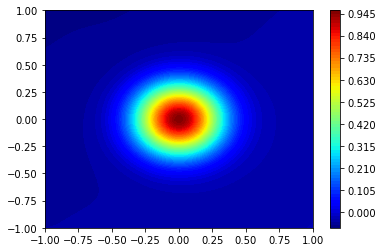

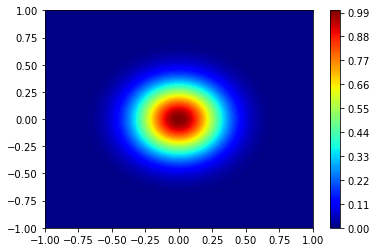

In [8]:
import matplotlib.pyplot as plt
x = torch.linspace(-1, 1, 100)
y = torch.linspace(-1, 1, 100)
x, y = torch.meshgrid(x, y)

x = x.unsqueeze(-1)
y = y.unsqueeze(-1)

u_ex = torch.exp(-10 * (x**2 + y**2)).reshape(100,100)
u= u_pred(x, y ,New_model)
print(torch.linalg.norm((u_ex - u)) / torch.linalg.norm(u_ex))
print(torch.mean((u - u_ex) ** 2))
x = torch.linspace(-1, 1, 100)
y = torch.linspace(-1, 1, 100)
plt.contourf(x,y,u.detach().numpy().reshape(100,100),levels = 100,cmap='jet')
plt.colorbar()
plt.show()


plt.contourf(x,y,u_ex,levels = 100,cmap='jet')
plt.colorbar()
plt.show()

### Automatization of PINN's

In [61]:

from Solving_Poisson import *
from Architectures import *

"""
The Goal of this function is to generalise PINN for so it can be trained on any given boundarys and source
funtion without the need of computing everything all over again
"""

def Evaluate_PINN(x,y,model,epochs ,f_true = 0,  u_boundary_left = 0,u_boundary_up = 0, u_boundary_right = 0, u_boundary_down = 0 ,a = 0 ,b =0 ,c=0,d=0):

    # Comuting the LOSS function

    def loss_boundary_left(x, u_boundary_left, model):

        u_pred_boundary = u_pred(x, a*torch.ones_like(x), model)
        u_boundary_left =  u_boundary_left.view_as(u_pred_boundary)

        return torch.mean((u_pred_boundary- u_boundary_left)**2)
    def loss_boundary_up(x, u_boundary_up, model):

        u_pred_boundary = u_pred(x, b*torch.ones_like(x), model)
        u_boundary_up =  u_boundary_up.view_as(u_pred_boundary)

        return torch.mean((u_pred_boundary- u_boundary_up)**2)

    def loss_boundary_right(y, u_boundary,model):

        u_pred_boundary = u_pred(c*torch.ones_like(y), y, model)
        u_boundary =  u_boundary.view_as(u_pred_boundary)

        return torch.mean((u_pred_boundary - u_boundary)**2)

    def loss_boundary_down(y, u_boundary,model):

        u_pred_boundary = u_pred(d*torch.ones_like(y), y, model)
        u_boundary =  u_boundary.view_as(u_pred_boundary)

        return torch.mean((u_pred_boundary - u_boundary)**2)

    def loss_of_pde(x, y ,f_true, model):

        f_pred = calculate_laplacian(x, y, model)
        f_true = f_true.view_as(f_pred)

        return torch.mean((f_pred - f_true )**2)
    
    def New_loss(x,y,model,w1= 1.0, w2=1.0, w3=1.0):
        loss_b_l = loss_boundary_left(x,u_boundary_left, model)
        loss_b_u = loss_boundary_up(x,u_boundary_up, model)
        loss_b_r = loss_boundary_right(y,u_boundary_right, model)
        loss_b_d = loss_boundary_down(y,u_boundary_down, model)
        loss_pde = loss_of_pde(x, y,f_true, model)

        return loss_b_l + loss_b_u + loss_b_r + loss_b_d + loss_pde , w1, w2, w3
    
    # Training the model
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

    model,LOSS_1 , MSE_1 , L2_error_1 ,_,_,_  = train_pinn(x, y, model , optimizer,scheduler ,epochs,New_loss)
    
    return model,LOSS_1 , MSE_1 , L2_error_1



### Training on a random function

In [66]:
model= Net(2,1,50,4).to(device)
x = torch.linspace(0, 9, 100).to(device)
y = torch.linspace(0, 4, 100).to(device)
x, y = torch.meshgrid(x, y)

x_flat = x.flatten().unsqueeze(1)
y_flat = y.flatten().unsqueeze(1)

f_true = torch.zeros_like(x_flat)

u_boundary_up =  torch.sin(x) / torch.sin(torch.tensor(9))
u_boudary_left = torch.zeros_like(x_flat)
u_boundary_right =  torch.sin(x) / torch.sin(torch.tensor(4))
u_boudary_down = torch.zeros_like(y_flat)



model,LOSS_1 , MSE_1 , L2_error_1 = Evaluate_PINN(x_flat,y_flat,model,1500 ,f_true,u_boundary_up,u_boundary_left,u_boundary_right ,u_boudary_down ,9,0,4,0)

Epoch 0, Loss 6.970463275909424, mse : 0.3313026428222656,l2_error: 15.124336242675781
Epoch 100, Loss 1.196470856666565, mse : 0.6553228497505188,l2_error: 21.271177291870117
Epoch 200, Loss 1.1252332925796509, mse : 0.6406117081642151,l2_error: 21.031068801879883
Epoch 300, Loss 1.1201276779174805, mse : 0.6348100304603577,l2_error: 20.935617446899414
Epoch 400, Loss 1.119516134262085, mse : 0.6341117024421692,l2_error: 20.924100875854492
Epoch 500, Loss 1.1194456815719604, mse : 0.6340324282646179,l2_error: 20.92279052734375
Epoch 600, Loss 1.1194384098052979, mse : 0.6340200304985046,l2_error: 20.92258644104004
Epoch 700, Loss 1.1194380521774292, mse : 0.6340188384056091,l2_error: 20.92256736755371
Epoch 800, Loss 1.1194380521774292, mse : 0.6340188384056091,l2_error: 20.92256736755371
Epoch 900, Loss 1.1194380521774292, mse : 0.6340187788009644,l2_error: 20.92256736755371
Epoch 1000, Loss 1.1194380521774292, mse : 0.6340187788009644,l2_error: 20.92256736755371
Epoch 1100, Loss 1.1

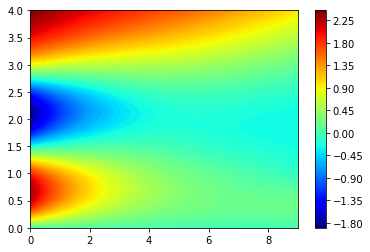

In [67]:
x = torch.linspace(-1, 1, 100)
y = torch.linspace(-1, 1, 100)
x, y = torch.meshgrid(x, y)

x = x.unsqueeze(-1)
y = y.unsqueeze(-1)


u= u_pred(x_flat, y_flat ,model).cpu()

x = torch.linspace(0, 9, 100)
y = torch.linspace(0, 4, 100)
plt.contourf(x,y,u.detach().numpy().reshape(100,100),levels = 100,cmap='jet')
plt.colorbar()
plt.show()